In [5]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive visualization
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [7]:
data = pd.read_csv("books.csv", error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [8]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [9]:
data.shape

(11123, 12)

In [10]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [11]:
# remove spaces from the column name
data.columns = data.columns.str.strip()

In [12]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [14]:
# getting summary of the data
data.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [16]:
# getting summary of object data type
data.describe(include="object")

,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Iliad,Stephen King,0552992097,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


In [17]:
data.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [19]:
data.duplicated().sum()

0

In [21]:
data.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

### Feature Engineering

- Extract important features
- reducing size of the features
- creating new features from the existing ones

In [22]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [27]:
data["isbn"].nunique()

11123

In [28]:
data["isbn13"].nunique()

11123

In [29]:
# reducing the size of the features
# droping the unnecessary columns
data.drop(['bookID','isbn', 'isbn13'], axis=1 , inplace=True)

In [30]:
data.head(3)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic


In [31]:
data["publication_date"]

0         9/16/2006
1          9/1/2004
2         11/1/2003
3          5/1/2004
4         9/13/2004
            ...    
11118    12/21/2004
11119     12/1/1988
11120      8/1/1993
11121     2/27/2007
11122     5/28/2006
Name: publication_date, Length: 11123, dtype: object

In [35]:
data["year"] = data["publication_date"].str.split("/")
data["year"] = data["year"].apply(lambda x: x[2])

In [37]:
data.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004


In [38]:
data.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                   object
dtype: object

In [40]:
data["year"] = data["year"].astype(int)

In [41]:
data["year"].min()

1900

In [42]:
data["year"].max()

2020

### Explotary data Analysis

In [43]:
data[data["year"] == 2020][["title", "authors" , "average_rating", "language_code", "publisher"]]

,title,authors,average_rating,language_code,publisher
9664,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,eng,Avon


In [47]:
data.groupby(["year"])["title"].agg("count").sort_values(ascending=False).head(20)

year
2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
1997     290
1996     250
1995     249
1994     220
1992     183
1993     165
1991     151
1989     118
1990     117
1987      88
Name: title, dtype: int64

Text(0.5, 1.0, 'Top 10 Author with maximum books published')

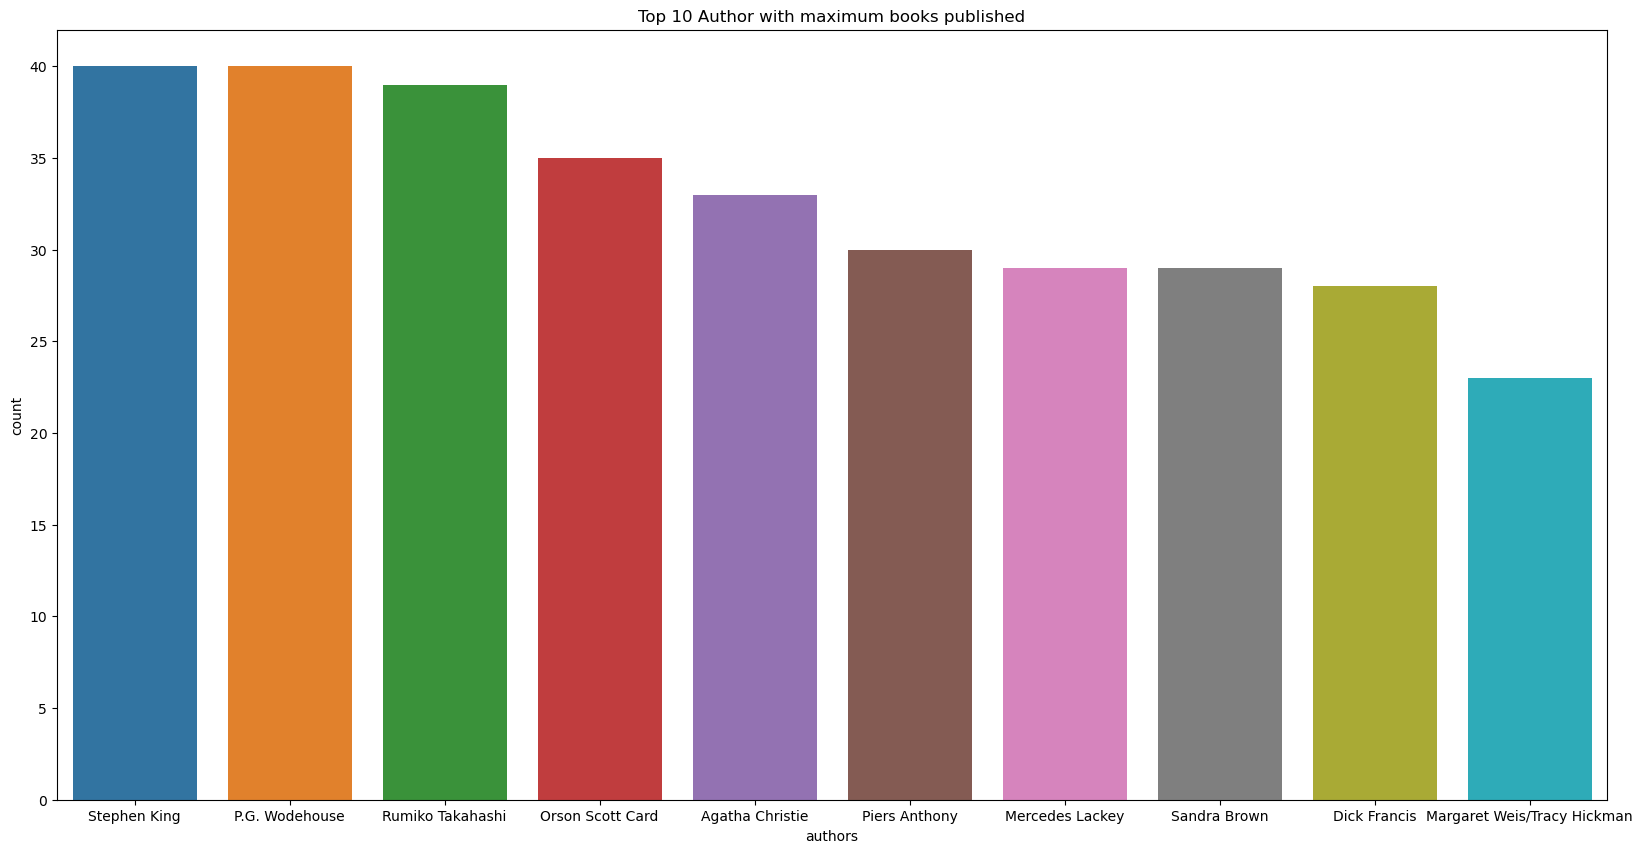

In [67]:
plt.figure(figsize=(20,10))
sns.countplot(data=data , x="authors", order=data["authors"].value_counts().iloc[:10].index)
plt.title("Top 10 Author with maximum books published")

In [68]:
data["language_code"].value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
lat         3
enm         3
rus         2
swe         2
ale         1
ara         1
msa         1
srp         1
gla         1
tur         1
wel         1
glg         1
nl          1
nor         1
Name: language_code, dtype: int64

In [75]:
data.groupby(["language_code"])[["average_rating", 
                                 "ratings_count", 
                                 "text_reviews_count"]].agg("mean").style.background_gradient(cmap="Wistia")

,average_rating,ratings_count,text_reviews_count
language_code,,,
ale,4.360000,102.000000,16.000000
ara,3.550000,122.000000,12.000000
en-CA,4.025714,4086.714286,324.428571
en-GB,3.923411,2463.691589,104.060748
en-US,3.914659,3773.906960,160.357244
eng,3.934062,21570.272564,645.156601
enm,3.873333,3233.666667,84.000000
fre,3.971528,3277.319444,64.513889
ger,3.950101,234.727273,8.232323


In [76]:
book = data["title"].value_counts()[:20]

In [77]:
book

The Iliad                        9
The Brothers Karamazov           9
The Odyssey                      8
Anna Karenina                    8
'Salem's Lot                     8
Gulliver's Travels               8
The Picture of Dorian Gray       7
A Midsummer Night's Dream        7
The Scarlet Letter               6
Sense and Sensibility            6
The Histories                    6
Romeo and Juliet                 6
Treasure Island                  6
Collected Stories                6
The Secret Garden                6
The Great Gatsby                 6
Jane Eyre                        6
Macbeth                          6
Robinson Crusoe                  6
One Hundred Years of Solitude    5
Name: title, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'The Iliad'),
  Text(1, 0, 'The Brothers Karamazov'),
  Text(2, 0, 'The Odyssey'),
  Text(3, 0, 'Anna Karenina'),
  Text(4, 0, "'Salem's Lot"),
  Text(5, 0, "Gulliver's Travels"),
  Text(6, 0, 'The Picture of Dorian Gray'),
  Text(7, 0, "A Midsummer Night's Dream"),
  Text(8, 0, 'The Scarlet Letter'),
  Text(9, 0, 'Sense and Sensibility'),
  Text(10, 0, 'The Histories'),
  Text(11, 0, 'Romeo and Juliet'),
  Text(12, 0, 'Treasure Island'),
  Text(13, 0, 'Collected Stories'),
  Text(14, 0, 'The Secret Garden'),
  Text(15, 0, 'The Great Gatsby'),
  Text(16, 0, 'Jane Eyre'),
  Text(17, 0, 'Macbeth'),
  Text(18, 0, 'Robinson Crusoe'),
  Text(19, 0, 'One Hundred Years of Solitude')])

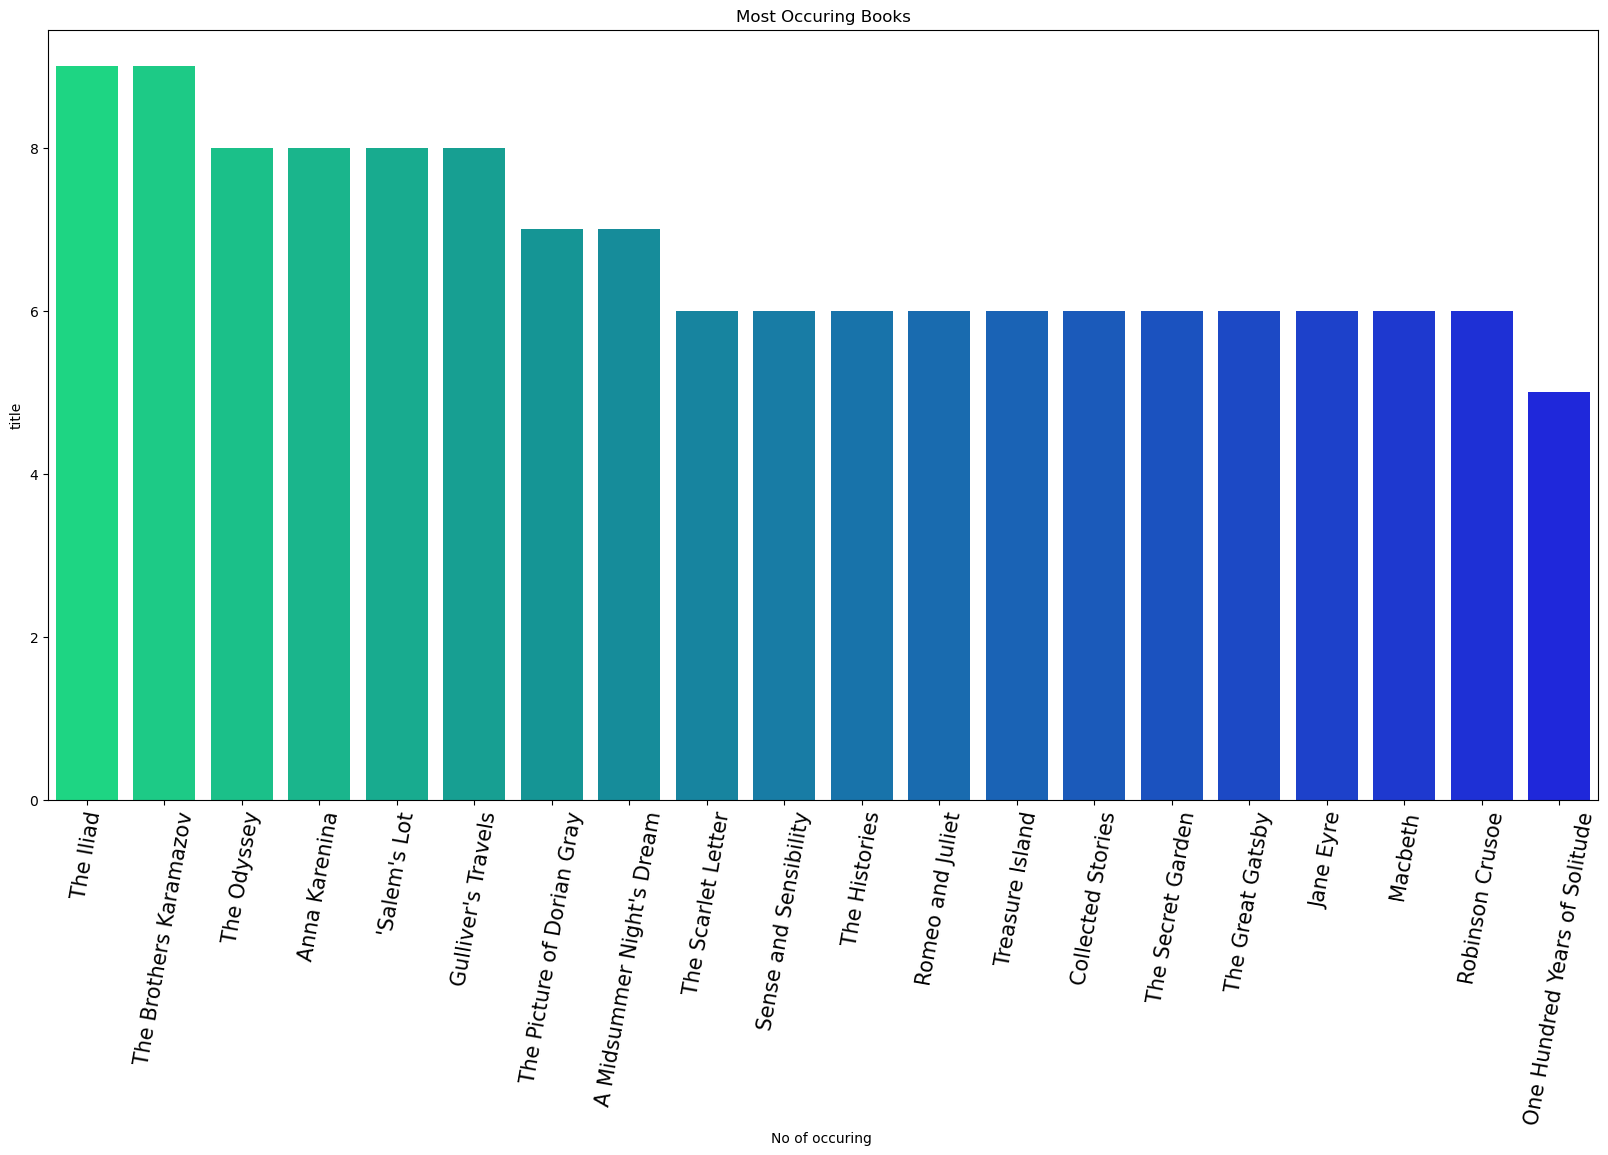

In [85]:
# most find occuring book in the data
plt.figure(figsize=(20 , 10))
sns.barplot(x = book.index , y = book , palette="winter_r")
plt.title("Most Occuring Books")
plt.xlabel("No of occuring ")
plt.xticks(rotation = 80, fontsize=15)

C:\Temp\ipykernel_3168\640360161.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["average_rating"])


<Axes: xlabel='average_rating', ylabel='Density'>

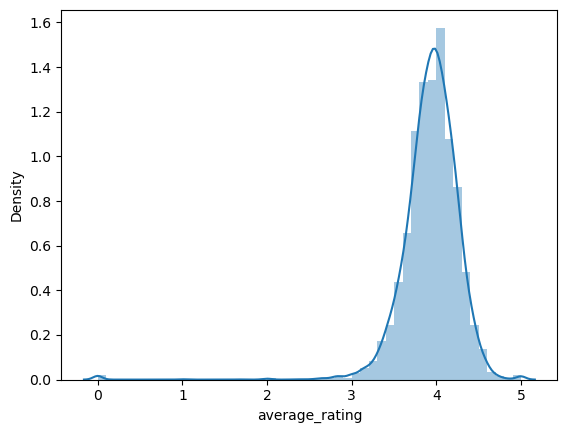

In [86]:
# average ratings
sns.distplot(data["average_rating"])

In [117]:
data[data["average_rating"] == data["average_rating"].max()][["authors", "average_rating"]]

,authors,average_rating
624,Aristophanes/F.W. Hall/W.M. Geldart,5.0
786,Julie Sylvester/David Sylvester,5.0
855,Tara MacCarthy,5.0
1243,Middlesex Borough Heritage Committee,5.0
4125,Tim Bogenn,5.0
4788,John Diamond,5.0
4933,Elena N. Mahlow,5.0
5023,Ian Martin/Katie Elliott,5.0
5474,NOT A BOOK,5.0
5476,NOT A BOOK,5.0


In [112]:
data.iloc[624]

title                 Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...
authors                             Aristophanes/F.W. Hall/W.M. Geldart
average_rating                                                      5.0
language_code                                                       grc
num_pages                                                           364
ratings_count                                                         0
text_reviews_count                                                    0
publication_date                                              2/22/1922
publisher                                  Oxford University Press  USA
year                                                               1922
Name: 624, dtype: object